**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



## Importing libraries and setting up the environment

In [54]:
# Importing libraries
import sys
sys.path.insert(0, '../Modules/')
import cv2
from Modules.Commons import *
from Modules.Kernels import *

1) Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

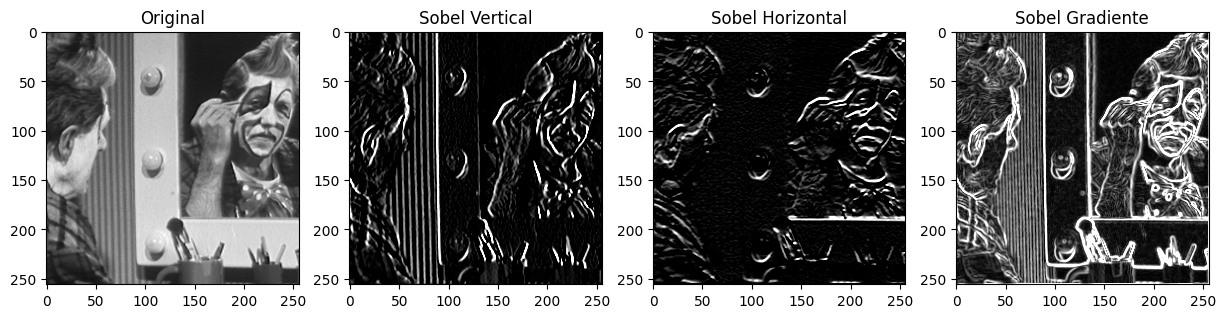

In [50]:
# Sobel Exercise
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
# plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

# applying sobel filters
sobel_v, sobel_h = sobel_kernels()
img_sobel_v = convolution(img1, sobel_v)
img_sobel_h = convolution(img1, sobel_h)
img_sobel_grd = gradient(img_sobel_h, img_sobel_v)

# Printing
images = np.array([[img1, img_sobel_v, img_sobel_h, img_sobel_grd]])
labels = np.array([['Original', 'Sobel Vertical', 'Sobel Horizontal', 'Sobel Gradiente']])
print_images(labels, images, _figsize=(15, 15))


### Sobel Solution
![SegmentLocal](cln1sob1.gif "segment")

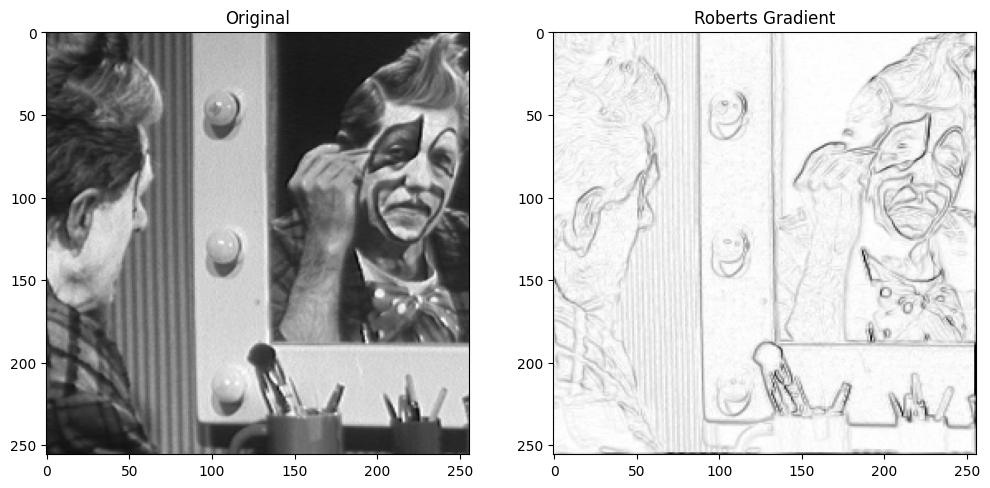

In [32]:
# Roberts Exercise
r1, r2 = roberts_cross_kernel()
img_r1 = convolution(img1, r1)
img_r2 = convolution(img1, r2)
img_rgrad = gradient(img_r1, img_r2)

# inverting image (to match the solution)
img_rgrad = 255 - img_rgrad

# Printing
images = np.array([[img1, img_rgrad]])
labels = np.array([['Original', 'Roberts Gradient']])
print_images(labels, images, _figsize=(12, 12))

### Roberts Solution
![SegmentLocal](cln1rob1.gif "segment")

In [28]:
# Roberts With SciPy
import scipy.signal

def roberts_cross(image):
    """
    Apply the Roberts Cross operator to an image.
    """
    # Define the Roberts Cross kernels
    gx = np.array([[1, 0], [0, -1]])
    gy = np.array([[0, 1], [-1, 0]])

    # Compute the gradient components
    grad_x = scipy.signal.convolve2d(image, gx, mode="same")
    grad_y = scipy.signal.convolve2d(image, gy, mode="same")

    # Combine the gradients to get edge magnitude
    magnitude = np.sqrt(grad_x**2 + grad_y**2)

    return magnitude

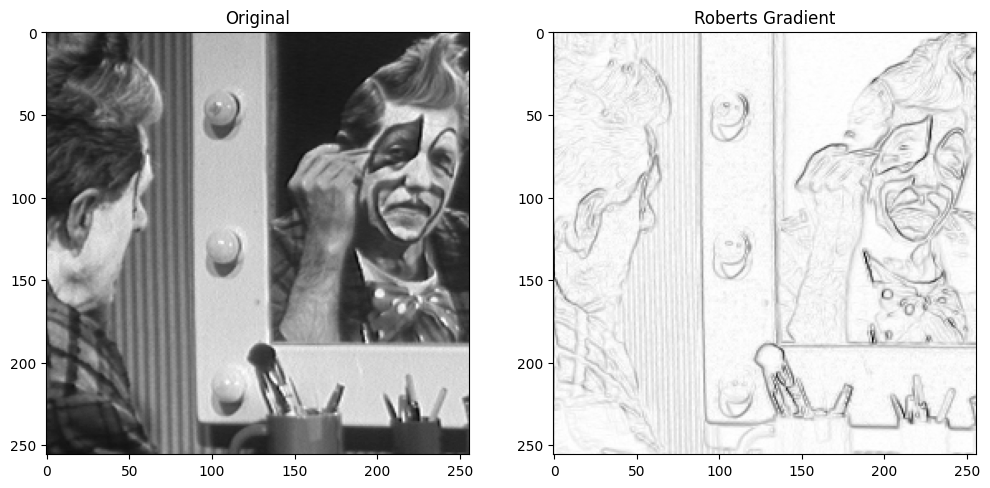

In [31]:
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
img_rgrad = roberts_cross(img1)
# inverting image
img_rgrad = 255 - img_rgrad

# Printing
images = np.array([[img1, img_rgrad]])
labels = np.array([['Original', 'Roberts Gradient']])
print_images(labels, images, _figsize=(12, 12))

2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

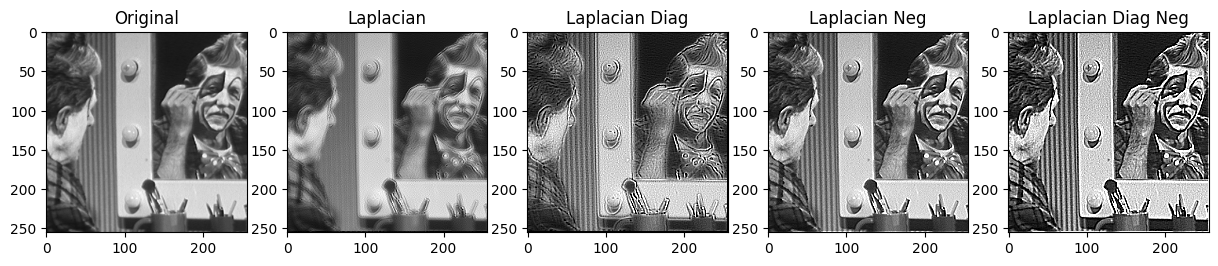

In [35]:
# Exercise Laplacian
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

lap_kernel = laplacian_kernel()
lap_kernel_diag = laplacian_kernel(diagonals=True)

# normal laplacian kernel
lap_sharp = convolution(img1, lap_kernel) + img1
# laplacian kernel with diagonals
lap_sharp_diag = convolution(img1, lap_kernel_diag) + img1
# normal laplacian kernel negative values (c = -1)
lap_sharp_neg =  convolution(img1, lap_kernel * (-1)) + img1
# laplacian kernel with diagonals and negative values (c = -1)
lap_sharp_diag_neg =  convolution(img1, lap_kernel_diag * (-1)) + img1

# Printing
images = np.array([[img1, lap_sharp, lap_sharp_diag, lap_sharp_neg, lap_sharp_diag_neg]])
labels = np.array([['Original', 'Laplacian', 'Laplacian Diag', 'Laplacian Neg', 'Laplacian Diag Neg']])
print_images(labels, images, _figsize=(15, 15))


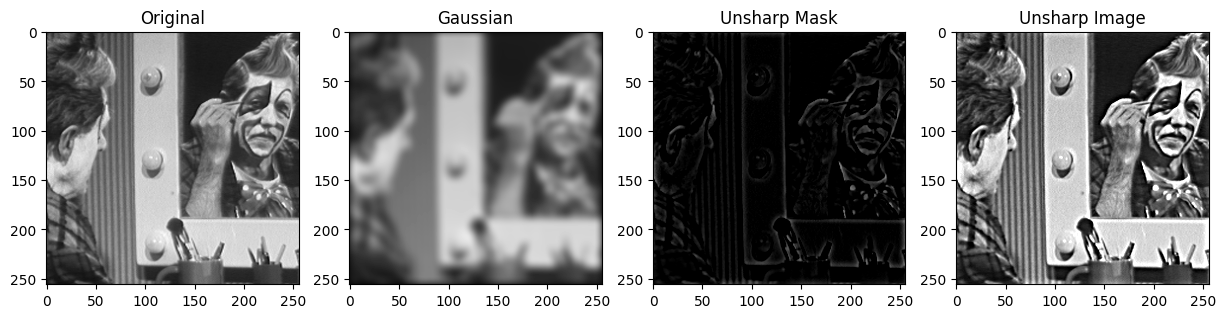

In [56]:
# Exercise Unsharp Masking
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)
# Gaussian Filter
# I got better results with a bigger Gaussian Kernel
new_img_gaussian5 = convolution(img1, gaussian_kernel((15, 15), 4))

# Unsharp Masking
k = 1
unsharp_mask = img1 - new_img_gaussian5
unsharp_img = img1 + k * unsharp_mask

# Printing
images = np.array([[img1, new_img_gaussian5, unsharp_mask, unsharp_img]])
labels = np.array([['Original', 'Gaussian', 'Unsharp Mask', 'Unsharp Image']])
print_images(labels, images, _figsize=(15, 15))

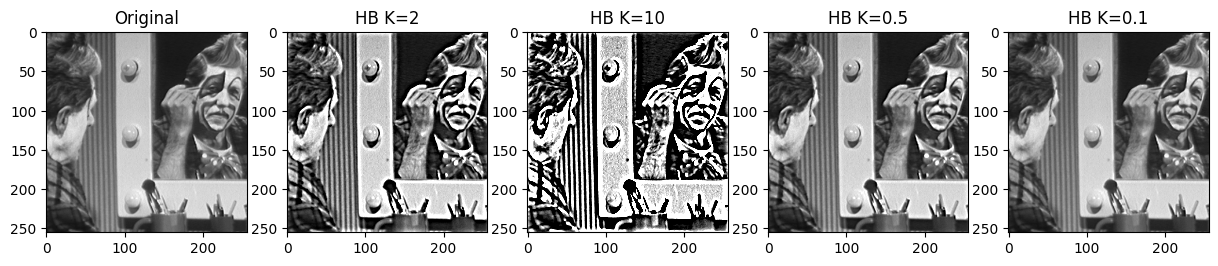

In [69]:
# Highboost filtering
unsharp_img_2 = img1 + 2 * unsharp_mask
unsharp_img_10 = img1 + 10 * unsharp_mask
unsharp_img_05 = img1 + 0.5 * unsharp_mask
unsharp_img_01 = img1 + 0.1 * unsharp_mask

# Printing
images = np.array([[img1, unsharp_img_2, unsharp_img_10, unsharp_img_05, unsharp_img_01]])
labels = np.array([['Original', 'HB K=2', 'HB K=10', 'HB K=0.5', 'HB K=0.1']])
print_images(labels, images, _figsize=(15, 15))

3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

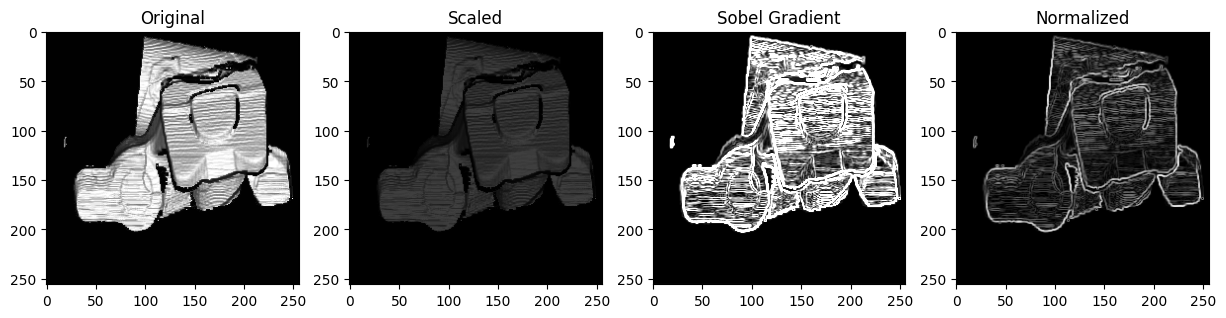

In [73]:
#code here
img1 = cv2.imread("ren1.png", cv2.IMREAD_GRAYSCALE)
# scaling image to avoid overflow
scaled_image = 0.25 * img1

# applying sobel filters
sobel_v, sobel_h = sobel_kernels()
img_sobel_v = convolution(img1, sobel_v)
img_sobel_h = convolution(img1, sobel_h)
img_sobel_grd = gradient(img_sobel_h, img_sobel_v)

# Normalize to 0-255 range
normalized = (img_sobel_grd / img_sobel_grd.max()) * 255
normalized = normalized.astype(np.uint8)

# Printing
images = np.array([[img1, scaled_image, img_sobel_grd, normalized]])
labels = np.array([['Original', 'Scaled', 'Sobel Gradient', 'Normalized']])
print_images(labels, images, _figsize=(15, 15))

4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

In [77]:
def threshold_image(image, threshold=150):
    """
    Convert the image to binary using the given threshold.
    """
    return (image > threshold).astype(np.uint8) * 255

def apply_sobel(img):
    """
    Apply the sobel operator to the image.
    """
    # applying sobel filters
    l_sobel_v, l_sobel_h = sobel_kernels()
    l_img_sobel_v = convolution(img, l_sobel_v)
    l_img_sobel_h = convolution(img, l_sobel_h)
    l_img_sobel_grd = gradient(l_img_sobel_h, l_img_sobel_v)

    return l_img_sobel_grd

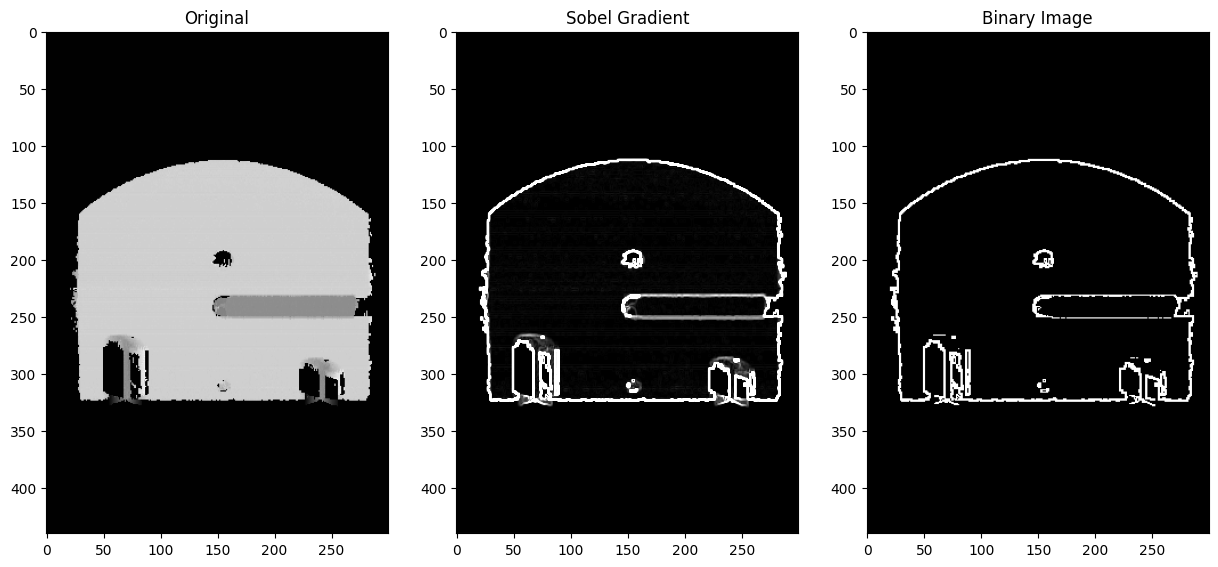

In [76]:
# Sobel + Threshold
img1 = cv2.imread("ufo2.png", cv2.IMREAD_GRAYSCALE)

# applying sobel filters
img_sobel_grd = apply_sobel(img1)

# Thresholding
binary_image = threshold_image(img_sobel_grd)

# Printing
images = np.array([[img1, img_sobel_grd, binary_image]])
labels = np.array([['Original', 'Sobel Gradient', 'Binary Image']])
print_images(labels, images, _figsize=(15, 15))

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

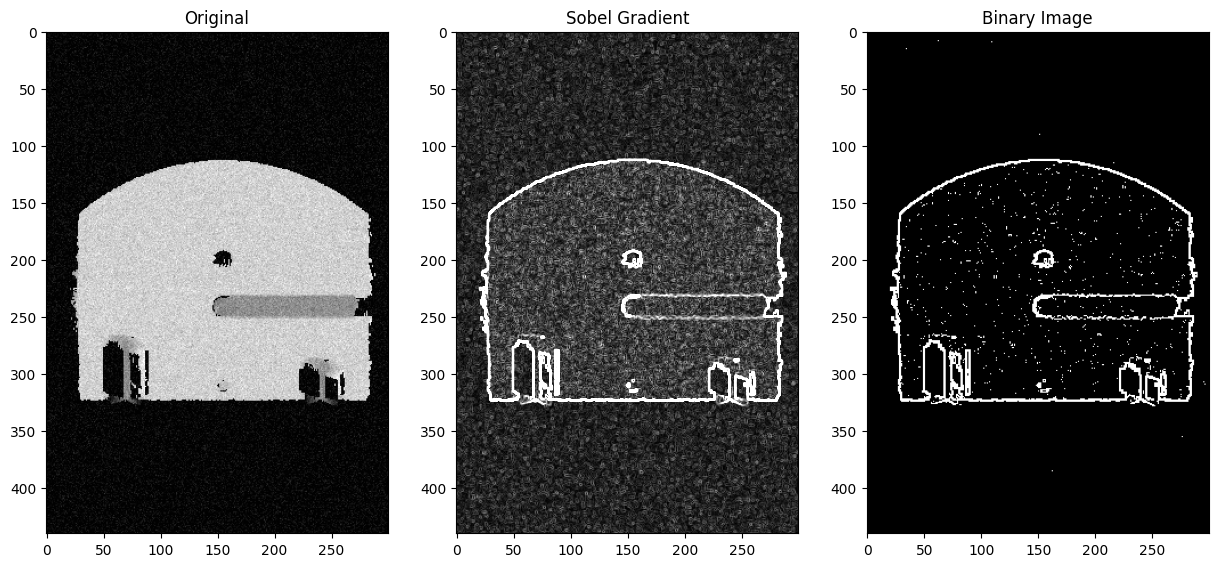

In [78]:
# Sobel + Threshold
img1 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

# applying sobel filters
img_sobel_grd = apply_sobel(img1)

# Thresholding
binary_image = threshold_image(img_sobel_grd)

# Printing
images = np.array([[img1, img_sobel_grd, binary_image]])
labels = np.array([['Original', 'Sobel Gradient', 'Binary Image']])
print_images(labels, images, _figsize=(15, 15))